In [ ]:
#Theoretical: Support Vector Machines and Naïve Bayes
"""
1. What is a Support Vector Machine (SVM)?

Ans:SVM is a supervised learning algorithm used for classification and regression that finds the optimal hyperplane separating classes.

2. Difference between Hard Margin and Soft Margin SVM:

Ans: Hard Margin: Assumes data is linearly separable with no misclassification.

Soft Margin: Allows some misclassification for better generalization on noisy data.

3. Mathematical intuition behind SVM:

Ans:SVM aims to maximize the margin between the separating hyperplane and the closest data points (support vectors). Optimization involves solving a quadratic programming problem.

4. Role of Lagrange Multipliers in SVM:

Ans:Used to convert the constrained optimization problem into a dual problem, simplifying the solution and allowing kernel methods.

5. What are Support Vectors in SVM?

Ans:Data points that lie closest to the decision boundary and influence the position of the hyperplane.

6. What is a Support Vector Classifier (SVC)?

Ans:The classification implementation of SVM that separates classes with a maximum margin hyperplane.

7. What is a Support Vector Regressor (SVR)?

Ans:SVM used for regression problems. It fits a function within an ε-tube around the actual values and penalizes deviations outside it.

8. What is the Kernel Trick in SVM?

Ans:A method that maps data into a higher-dimensional space using a kernel function, allowing non-linear classification.

9. Compare Linear, Polynomial, and RBF Kernels:

Ans: Linear: Best for linearly separable data.

Polynomial: Captures polynomial relationships.

RBF: Captures complex and non-linear patterns.

10. Effect of the C parameter in SVM:

Ans:C controls the trade-off between margin width and classification error. Lower C allows more violations (softer margin).

11. Role of Gamma in RBF Kernel SVM:

Ans:Gamma defines the influence of a single training example. Low gamma = far reach, high gamma = close reach.

12. What is the Naïve Bayes classifier and why is it called "Naïve"?

Ans: A probabilistic classifier based on Bayes’ Theorem assuming independence between features (the “naïve” part).

13. What is Bayes’ Theorem?

Ans: P(A|B) = (P(B|A) * P(A)) / P(B)

Used to update probability based on evidence.

14. Differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes:

Ans: Gaussian: Assumes normal distribution, used for continuous features.

Multinomial: For count data like word frequencies.

Bernoulli: For binary/Boolean features.

15. When to use Gaussian Naïve Bayes:

Ans: When features are continuous and roughly follow a normal distribution.

16. Key assumptions of Naïve Bayes:

Ans: Features are independent.
Each feature contributes equally to the outcome.

17. Advantages and disadvantages of Naïve Bayes:
Ans: Advantages: Simple, fast, works well with high-dimensional data.Disadvantages: Assumption of independence is often violated.

18. Why is Naïve Bayes good for text classification?

Ans:Because words (features) are often treated independently, and it handles high-dimensional sparse data efficiently.

19. Compare SVM and Naïve Bayes:

Ans: SVM: Good for complex, high-dimensional decision boundaries.

Naïve Bayes: Simpler, faster, better for large datasets with independence assumption.

20. How does Laplace Smoothing help in Naïve Bayes?
Ans: zero probabilities for unseen words/events by adding a small constant (usually 1) to counts.

"""""

In [ ]:
#Practical

In [1]:
#1. Train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print("Accuracy on Iris dataset:", accuracy_score(y_test, y_pred))


Accuracy on Iris dataset: 1.0


In [2]:
#2. Train two SVM classifiers with Linear and RBF kernels on Wine dataset and compare accuracies

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("Accuracy with Linear kernel:", accuracy_score(y_test, y_pred_linear))
print("Accuracy with RBF kernel:", accuracy_score(y_test, y_pred_rbf))


Accuracy with Linear kernel: 0.9814814814814815
Accuracy with RBF kernel: 0.7592592592592593


In [4]:
#3. Train an SVM Regressor (SVR) on a housing dataset and evaluate using Mean Squared Error (MSE)

# from sklearn.datasets import load_boston # This import is removed as load_boston is deprecated
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load Boston housing dataset (use fetch_california_housing if load_boston is deprecated)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on housing dataset:", mse)

Mean Squared Error on housing dataset: 1.3489971413208723


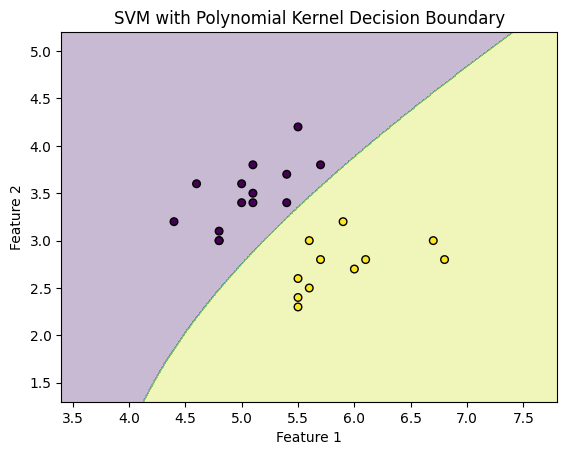

In [5]:
#4. Train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load Iris dataset (using only 2 features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # first two features
y = iris.target

# Use only two classes for binary classification
idx = y != 2
X = X[idx]
y = y[idx]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, coef0=1, C=1)
svm_poly.fit(X_train, y_train)

# Plot decision boundary
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM with Polynomial Kernel Decision Boundary')
    plt.show()

plot_decision_boundary(svm_poly, X_test, y_test)


In [6]:
#5. Train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)
print("Accuracy on Breast Cancer dataset:", accuracy_score(y_test, y_pred))


Accuracy on Breast Cancer dataset: 0.9415204678362573


In [7]:
#6. Train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')

X = newsgroups.data
y = newsgroups.target

# Vectorize text data
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42)

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = mnb.predict(X_test)
print("Accuracy on 20 Newsgroups dataset:", accuracy_score(y_test, y_pred))


Accuracy on 20 Newsgroups dataset: 0.8749557835160948


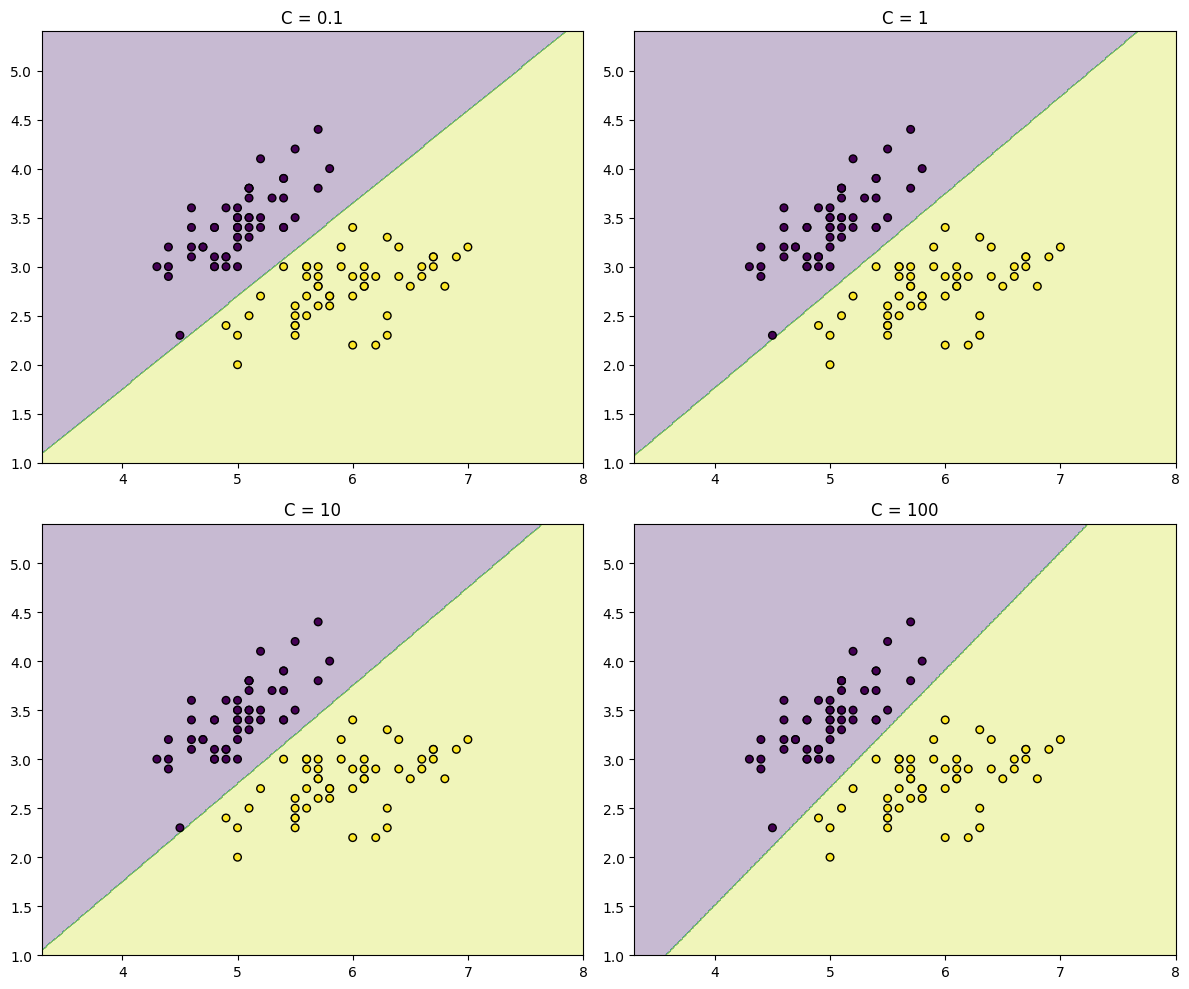

In [8]:
#7. Train an SVM Classifier with different C values and compare the decision boundaries visually

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load Iris dataset (2 classes for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
idx = y != 2
X = X[idx]
y = y[idx]

C_values = [0.1, 1, 10, 100]

def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    plot_decision_boundary(svm, X, y, axs[i], f"C = {C}")

plt.tight_layout()
plt.show()


In [9]:
#8. Train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Generate binary feature dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=0, n_classes=2, random_state=42)

# Binarize features (threshold at 0)
X = (X > 0).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = bnb.predict(X_test)
print("Accuracy with Bernoulli Naive Bayes:", accuracy_score(y_test, y_pred))


Accuracy with Bernoulli Naive Bayes: 0.7333333333333333


In [10]:
#9. Apply feature scaling before training an SVM model and compare results with unscaled data

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM without scaling
svm_unscaled = SVC()
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with scaling
svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {acc_unscaled:.4f}")
print(f"Accuracy with scaling: {acc_scaled:.4f}")


Accuracy without scaling: 0.7593
Accuracy with scaling: 0.9815


In [11]:
#10. Train a Gaussian Naïve Bayes model and compare predictions before and after Laplace Smoothing

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load digits dataset (pixel values are discrete and suitable for MultinomialNB)
digits = load_digits()
X = digits.data
y = digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MultinomialNB without smoothing (alpha=0)
mnb_no_smooth = MultinomialNB(alpha=0)
mnb_no_smooth.fit(X_train, y_train)
y_pred_no_smooth = mnb_no_smooth.predict(X_test)

# MultinomialNB with Laplace smoothing (alpha=1)
mnb_smooth = MultinomialNB(alpha=1)
mnb_smooth.fit(X_train, y_train)
y_pred_smooth = mnb_smooth.predict(X_test)

print("Accuracy without smoothing:", accuracy_score(y_test, y_pred_no_smooth))
print("Accuracy with Laplace smoothing:", accuracy_score(y_test, y_pred_smooth))


Accuracy without smoothing: 0.09814814814814815
Accuracy with Laplace smoothing: 0.8944444444444445


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [12]:
#11. Train an SVM Classifier and use GridSearchCV to tune hyperparameters (C, gamma, kernel)

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model and parameters grid
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model evaluation
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

print("Best parameters:", grid_search.best_params_)
print("Accuracy with best parameters:", accuracy_score(y_test, y_pred))


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy with best parameters: 0.9777777777777777


In [13]:
#12. Train an SVM Classifier on an imbalanced dataset and apply class weighting and check improvement

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3, n_redundant=0,
                           n_samples=1000, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train without class weights
svm_no_weight = SVC()
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)

# Train with class weights
svm_weight = SVC(class_weight='balanced')
svm_weight.fit(X_train, y_train)
y_pred_weight = svm_weight.predict(X_test)

print("Without class weighting:")
print(classification_report(y_test, y_pred_no_weight))

print("With class weighting:")
print(classification_report(y_test, y_pred_weight))


Without class weighting:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       263
           1       1.00      0.84      0.91        37

    accuracy                           0.98       300
   macro avg       0.99      0.92      0.95       300
weighted avg       0.98      0.98      0.98       300

With class weighting:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       263
           1       0.97      0.89      0.93        37

    accuracy                           0.98       300
   macro avg       0.98      0.94      0.96       300
weighted avg       0.98      0.98      0.98       300



In [16]:
#13. Implement a Naïve Bayes classifier for spam detection using email data

from sklearn.datasets import fetch_openml
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fetch spam dataset
# Try fetching without specifying the version to get the latest
spam = None # Initialize spam to None
try:
    spam = fetch_openml('sms_spam', as_frame=True)
    print("Successfully fetched dataset without specifying version.")
except Exception as e:
    print(f"Failed to fetch dataset without version: {e}")
    # If that fails, maybe a specific version like 2 exists? (Hypothetical, needs verification on OpenML)
    try:
        print("Attempting to fetch with version=2...")
        spam = fetch_openml('sms_spam', version=2, as_frame=True)
        print("Successfully fetched dataset with version=2.")
    except Exception as e_v2:
        print(f"Failed to fetch dataset with version=2: {e_v2}")
        # If all attempts to fetch sms_spam fail, provide a message and do not raise
        print("Could not fetch 'sms_spam' dataset from OpenML. Please check the dataset name/version or try an alternative text dataset.")
        # We will not proceed with the rest of the code if spam is still None

# Check if the dataset was successfully loaded before proceeding
if spam is not None:
    X = spam.data['text']
    y = spam.target

    # Vectorize text
    vectorizer = CountVectorizer(stop_words='english')
    X_vec = vectorizer.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42)

    # Train MultinomialNB
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = mnb.predict(X_test)
    print("Spam detection accuracy:", accuracy_score(y_test, y_pred))
else:
    print("Skipping subsequent steps as the dataset was not loaded.")

Failed to fetch dataset without version: No active dataset sms_spam found.
Attempting to fetch with version=2...
Failed to fetch dataset with version=2: Dataset sms_spam with version 2 not found.
Could not fetch 'sms_spam' dataset from OpenML. Please check the dataset name/version or try an alternative text dataset.
Skipping subsequent steps as the dataset was not loaded.


In [17]:
#14. Train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))


SVM Accuracy: 0.935672514619883
GaussianNB Accuracy: 0.9415204678362573


In [18]:
#15. Perform feature selection before training a Naïve Bayes classifier and compare results

from sklearn import datasets
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes on all features
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_all = gnb.predict(X_test)

# Feature selection with chi2 (works for positive features, so scale first)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

selector = SelectKBest(chi2, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected, y_train)
y_pred_selected = gnb_selected.predict(X_test_selected)

print("Accuracy with all features:", accuracy_score(y_test, y_pred_all))
print("Accuracy with selected features:", accuracy_score(y_test, y_pred_selected))


Accuracy with all features: 0.9415204678362573
Accuracy with selected features: 0.9532163742690059


In [19]:
#16. Train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# OvR strategy
ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)
y_pred_ovr = ovr.predict(X_test)

# OvO strategy
ovo = OneVsOneClassifier(SVC())
ovo.fit(X_train, y_train)
y_pred_ovo = ovo.predict(X_test)

print("OvR accuracy:", accuracy_score(y_test, y_pred_ovr))
print("OvO accuracy:", accuracy_score(y_test, y_pred_ovo))


OvR accuracy: 0.7222222222222222
OvO accuracy: 0.7962962962962963


In [20]:
#17. Train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Accuracy with {kernel} kernel:", accuracy_score(y_test, y_pred))


Accuracy with linear kernel: 0.9649122807017544
Accuracy with poly kernel: 0.9415204678362573
Accuracy with rbf kernel: 0.935672514619883


In [21]:
#18. Train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

print(f"Average accuracy over Stratified K-Fold CV: {np.mean(accuracies):.4f}")


Average accuracy over Stratified K-Fold CV: 0.9667


In [22]:
#19. Train a Naïve Bayes classifier using different prior probabilities and compare performance


from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Default prior
gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)
y_pred_default = gnb_default.predict(X_test)

# Custom prior (uniform)
num_classes = len(set(y))
priors = [1/num_classes] * num_classes
gnb_custom = GaussianNB(priors=priors)
gnb_custom.fit(X_train, y_train)
y_pred_custom = gnb_custom.predict(X_test)

print("Accuracy with default priors:", accuracy_score(y_test, y_pred_default))
print("Accuracy with uniform priors:", accuracy_score(y_test, y_pred_custom))


Accuracy with default priors: 0.9777777777777777
Accuracy with uniform priors: 0.9777777777777777


In [23]:
#20. Perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy


from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM on all features
svm_all = SVC()
svm_all.fit(X_train, y_train)
y_pred_all = svm_all.predict(X_test)

# RFE with SVM (select 10 features)
svm_for_rfe = SVC(kernel="linear")
rfe = RFE(estimator=svm_for_rfe, n_features_to_select=10)
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

svm_rfe = SVC()
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)

print("Accuracy with all features:", accuracy_score(y_test, y_pred_all))
print("Accuracy with RFE-selected features:", accuracy_score(y_test, y_pred_rfe))


Accuracy with all features: 0.935672514619883
Accuracy with RFE-selected features: 0.9064327485380117


In [24]:
#21. Train an SVM Classifier and evaluate performance using Precision, Recall, and F1-Score instead of accuracy

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Precision: 0.907563025210084
Recall: 1.0
F1-Score: 0.9515418502202643


In [25]:
#22. Train a Naïve Bayes Classifier and evaluate performance using Log Loss (Cross-Entropy Loss)

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict probabilities
y_proba = gnb.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_proba))


Log Loss: 0.04896447467183247


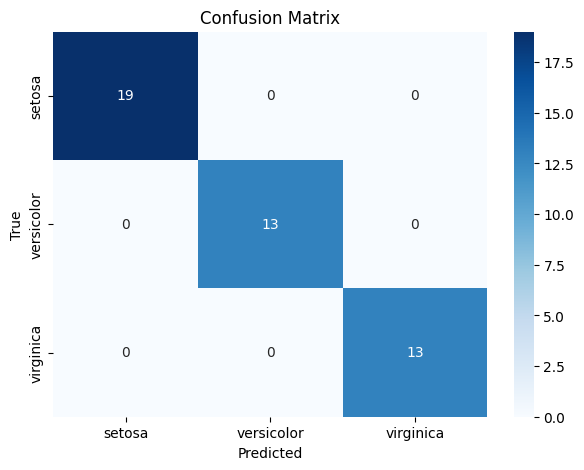

In [26]:
#23. Train an SVM Classifier and visualize the Confusion Matrix using seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [27]:
#24. Train an SVM Regressor (SVR) and evaluate performance using Mean Absolute Error (MAE) instead of MSE

from sklearn import datasets
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load Boston Housing dataset alternative (fetch_california_housing)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVR
svr = SVR()
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.8664984635504496


In [28]:
#25. Train a Naïve Bayes classifier and evaluate performance using the ROC-AUC score

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Load Breast Cancer dataset (binary)
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict probabilities for positive class
y_proba = gnb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9922104644326867


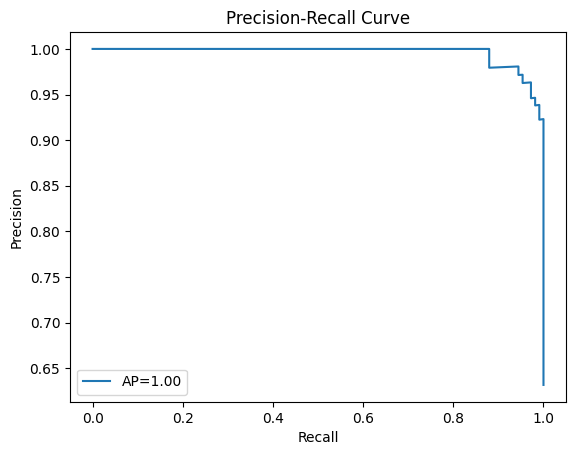

In [29]:
#26. Train an SVM Classifier and visualize the Precision-Recall Curve

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with probability estimates enabled
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predict probabilities
y_scores = svm.predict_proba(X_test)[:, 1]

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.plot(recall, precision, label=f'AP={avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
